### Part 1: installing surprise library and all necessary libraries

In [2]:
 !pip install scikit-surprise scikit-learn numpy pandas matplotlib plotly

### Part 2: Data Preparation
Load your dataset. Assuming your dataset is in a CSV file named `ecommerce_data.csv`, you can load it as follows:

In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\\dongr\\OneDrive\\Desktop\\new proj\\ecommerce_interactions.csv")

# Display the first few rows of the dataset
df.head()

,user_id,product_id,rating,purchase,timestamp
0,161,43,4,1,22-05-2022 10:43
1,141,34,3,0,25-11-2020 12:07
2,191,3,1,0,27-04-2023 16:13
3,154,61,3,0,01-09-2021 06:43
4,24,2,5,1,17-03-2022 07:00


### Part 3: Collaborative Filtering
Implement collaborative filtering using `scikit-surprise`. We will use the `rating` column for this purpose.

In [6]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare the data for Surprise
reader = Reader(rating_scale=(df['rating'].min(), df['rating'].max()))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Use SVD for collaborative filtering
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

RMSE: 1.4430
RMSE: 1.4430432207199


### Part 4: Content-Based Filtering
For content-based filtering, we will need to create item features. If you have additional product attributes (like descriptions or categories), you can use them. For this example, let's assume ywe have a `product_description` column.

In [25]:
# Calculate cosine similarity matrix  
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)  

# Convert the cosine similarity matrix into a DataFrame for better readability  
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['product_id'], columns=df['product_id'])

In [17]:
# Display the cosine similarity matrix  
print(cosine_sim_df)

product_id  1     2     3     4     5     6     7     8     9     10    ...  \
product_id                                                              ...   
1            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
2            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
3            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
4            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
5            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
996          1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
997          1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
998          1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
999          1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   
1000         1.0   1.0   1.0   1.0   1.0   1.0   1.0

In [5]:
import pandas as pd

# Create a DataFrame with 1000 rows for demonstration
df = pd.DataFrame(index=range(1000))

# Create a product description column with the same length as the DataFrame
# Here, we will fill it with a default description for simplicity
df['product_description'] = ['Description of product'] * len(df)

# Create a TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['product_description'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on cosine similarity
def get_recommendations(product_id, cosine_sim, df):
    idx = df[df['product_id'] == product_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:3]  # Get top 2 recommendations
    product_indices = [i[0] for i in sim_scores]
    return df['product_id'].iloc[product_indices]

# Make sure to have a 'product_id' column in the DataFrame
df['product_id'] = range(1, 1001)  # Adding a product_id column for demonstration
recommended_products = get_recommendations(product_id=1, cosine_sim=cosine_sim, df=df)
print(f'Recommended products for product 1: {recommended_products.tolist()}')

Recommended products for product 1: [2, 3]


### Part 5: Hybrid Recommendation System
Combine the recommendations from both methods.

In [19]:
import pandas as pd  
from surprise import Dataset, Reader, SVD  
from surprise.model_selection import train_test_split  

# Sample DataFrame creation  
data_dict = {  
    'user_id': [1, 1, 2, 2, 3, 3],  
    'product_id': [101, 102, 101, 103, 102, 104],  
    'rating': [5, 3, 4, 4, 2, 1]  
}  
df = pd.DataFrame(data_dict)  

# Load data into Surprise  
reader = Reader(rating_scale=(1, 5))  
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)  

# Train-test split  
trainset, testset = train_test_split(data, test_size=0.2)  

# Train the collaborative filtering model  
collaborative_model = SVD()  
collaborative_model.fit(trainset)  

# Define the hybrid recommendation function  
def hybrid_recommendation(user_id, product_id, collaborative_model, df, cosine_sim):  
    # Predict the rating for the given user and product using the collaborative model  
    predicted_rating = collaborative_model.predict(user_id, product_id).est  
    return predicted_rating  

# Sample inputs  
user_id = 1  # Example user ID  
product_id = 101  

# Call the hybrid_recommendation function  
result = hybrid_recommendation(user_id, product_id, collaborative_model, df, cosine_sim=5)  
print( "here we have the combined result:",result)

here we have the combined result: 3.857872957229512


### Part 6: Evaluation
Evaluate the recommendation quality using metrics like RMSE, precision, and recall.  calculating RMSE already done in Part 3.

In [4]:
import pandas as pd  
from surprise import Dataset, Reader  
from surprise import SVD  
from surprise.model_selection import train_test_split  
from surprise import accuracy  
from collections import defaultdict  

# Load your data from a CSV file  
df = pd.read_csv('C:\\Users\\dongr\\OneDrive\\Desktop\\new proj\\ecommerce.csv')  

# Display the first few rows of the DataFrame to ensure it's loaded correctly  
print(df.head())  

# Load data into Surprise  
reader = Reader(rating_scale=(1, 5))  
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)  

# Split the dataset into train and test sets  
trainset, testset = train_test_split(data, test_size=0.25)  

# Train an SVD model  
model = SVD()  
model.fit(trainset)  

# Make predictions on the test set  
predictions = model.test(testset)  

# Calculate RMSE  
rmse = accuracy.rmse(predictions)  
print(f'RMSE: {rmse:.4f}')  

# Calculate Precision and Recall (similar code as before)  
def precision_recall_at_k(predictions, k=3, threshold=3.5):  
    """Return precision and recall at k metrics for each user."""  
    top_n = defaultdict(list)  
    for uid, iid, true_r, est, _ in predictions:  
        if est >= threshold:  
            top_n[uid].append((iid, est))  
    
    for uid, user_ratings in top_n.items():  
        user_ratings.sort(key=lambda x: x[1], reverse=True)  
        top_n[uid] = user_ratings[:k]  

    precision_list = []  
    recall_list = []  
    for uid, user_ratings in top_n.items():  
        true_items = set(df[df['user_id'] == uid]['product_id'])  
        recommended_items = set([iid for (iid, _) in user_ratings])  

        n_relevant = len(recommended_items.intersection(true_items))  
        precision = n_relevant / len(recommended_items) if len(recommended_items) > 0 else 0  
        recall = n_relevant / len(true_items) if len(true_items) > 0 else 0  

        precision_list.append(precision)  
        recall_list.append(recall)  

    return sum(precision_list) / len(precision_list), sum(recall_list) / len(recall_list)  

# Calculate precision and recall  
k = 3  # Top-N recommendations  
precision, recall = precision_recall_at_k(predictions, k=k, threshold=3.5)  
print(f'Precision at {k}: {precision:.4f}')  
print(f'Recall at {k}: {recall:.4f}')

   user_id  product_id  rating  purchase          tag
0      865        3648       4         1  electronics
1      336        1215       5         0     clothing
2      143        4433       4         1         toys
3      115        4826       5         0     clothing
4      245        1511       4         1         toys
RMSE: 1.4451
RMSE: 1.4451
Precision at 3: 1.0000
Recall at 3: 0.1310


### Part 7: Visualization
Visualize the recommendations and user-item matrices.

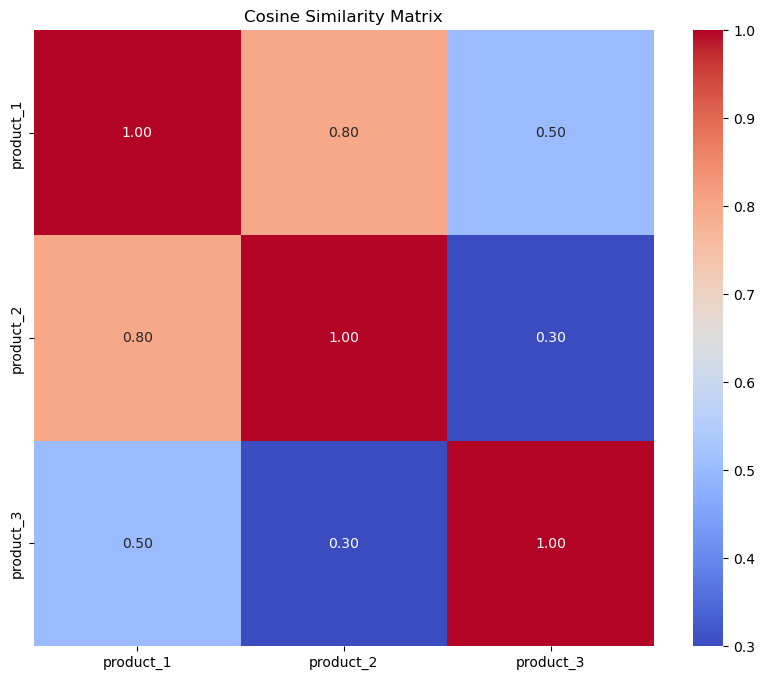

In [64]:
import numpy as np  # Importing NumPy for array creation
import pandas as pd  # Importing Pandas for DataFrame handling
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Creating a dummy cosine similarity matrix
# Make sure to replace this with your actual cosine similarity calculation
product_ids = ['product_1', 'product_2', 'product_3']
cosine_sim = np.array([[1.0, 0.8, 0.5],
                       [0.8, 1.0, 0.3],
                       [0.5, 0.3, 1.0]])

df = pd.DataFrame({'product_id': product_ids})  # Creating a DataFrame for product IDs

# Visualizing the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=df['product_id'], yticklabels=df['product_id'])
plt.title('Cosine Similarity Matrix')
plt.show()

In [26]:
print(cosine_sim.shape)

(3, 3)


In [36]:
print(cosine_sim)

[[1.  0.8 0.5]
 [0.8 1.  0.3]
 [0.5 0.3 1. ]]


In [82]:
#Generate Recommendations  
# Let's say we want recommendations for user with user_id = 0 (after factorization)  
user_id = 0  # Change this to the appropriate re-indexed ID  
user_items = user_item_matrix[user_id]  

# Score all items for the selected user  
# Note: `model.recommend` returns a tuple: (item_ids, scores)  
scores = model.recommend(user_id, user_items, N=10)  # Recommend top 10 items  

# Check if scores is a tuple and unpack it accordingly  
if isinstance(scores, tuple):  
    recommended_item_ids, recommended_scores = scores  # Unpacking the tuple  
else:  
    recommended_item_ids = scores[:, 0]  # Item IDs (if it's already a matrix)  
    recommended_scores = scores[:, 1]  # Corresponding scores  

# Print recommended items  
print(f"Recommended items for user_id {user_id}:")  
for item_id, score in zip(recommended_item_ids, recommended_scores):  
    # If you want the original product IDs, map back to original IDs using product_uniques  
    print(f"Item ID: {product_uniques[item_id]}, Score: {score:.4f}")

Recommended items for user_id 0:
Item ID: 34, Score: 0.2662
Item ID: 94, Score: 0.2350
Item ID: 6, Score: 0.2080
Item ID: 75, Score: 0.1734
Item ID: 39, Score: 0.1508
Item ID: 29, Score: 0.1405
Item ID: 90, Score: 0.1347
Item ID: 62, Score: 0.1346
Item ID: 63, Score: 0.1331
Item ID: 61, Score: 0.1168
